mnist = tf.keras.datasets.mnist
(train_x,train_y),(test_x,test_y) = mnist.load_data(path='./mnist.npz')

In [6]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_x.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


In [8]:
train_x = train_x.reshape(-1, 28 * 28)
test_x = test_x.reshape(-1, 28 * 28)
print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


In [10]:
train_x,test_x = tf.cast(train_x/255.0, tf.float32), tf.cast(test_x/255.0, tf.float32)
train_y,test_y = tf.cast(train_y, tf.int32), tf.cast(test_y, tf.int32)
type(train_x), type(train_y)

(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

In [23]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(512,activation='relu', input_shape=(28*28,)))
network.add(tf.keras.layers.Dense(10,activation='softmax'))

network.summary()

network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
network.fit(train_x, train_y, epochs=15, batch_size=128)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 1.4776 - accuracy: 0.6522
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.5852 - accuracy: 0.8541
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.4106 - accuracy: 0.8888
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.3536 - accuracy: 0.9009
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3247 - accuracy: 0.9068
Epoch 6/15

In [15]:
test_loss, test_acc = network.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2999 - accuracy: 0.9125


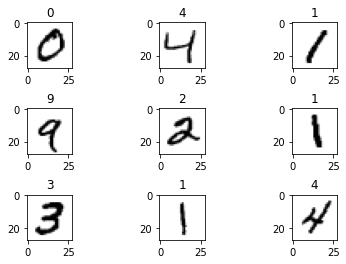

In [41]:
(mnist_train_x,mnist_train_y),(mnist_test_x,mnist_test_y) = mnist.load_data(path='./mnist.npz')

digit = mnist_train_x[:10]

import matplotlib.pyplot as plt

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(digit[i], cmap=plt.cm.binary)
    plt.title(network.predict(digit[i].reshape(-1, 28 * 28)/255.).argmax())

plt.subplots_adjust(wspace =.9, hspace =.9)   
plt.show()